# Titanic Passangers Survival

The Titanic tragedy is one of the most well-known maritime disasters in history. By analyzing passenger data, we can explore the factors that influenced survival rates. Our goal is to build a machine learning model to predict whether a passenger survived based on available information.

Data Source: https://www.kaggle.com/c/titanic/data?select=train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\giova\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('train.csv')

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

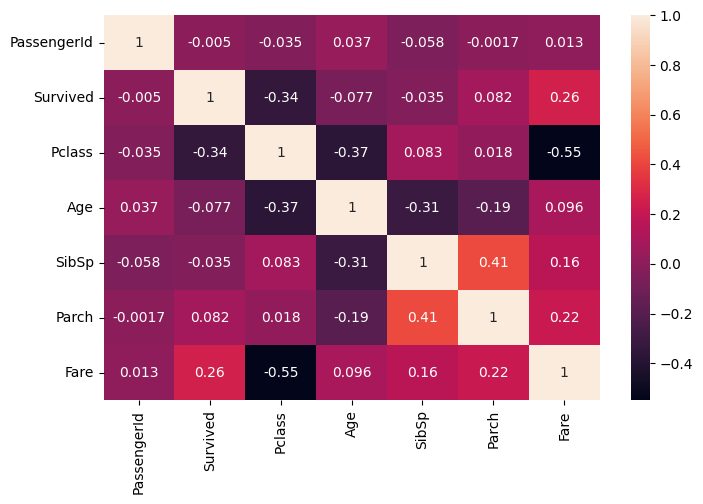

In [6]:
numerik_data=data.select_dtypes(include=['number'])

plt.figure(figsize=(8,5))
sb.heatmap(numerik_data.corr(), annot=True)

These columns were selected based on their potential impact on survival prediction:

1. Pclass (Passenger Class) – Represents socioeconomic status, which significantly influenced survival rates. First-class passengers had a higher chance of survival compared to lower-class passengers.
2. Age – Age plays a crucial role as children were more likely to be rescued, and elderly passengers might have had a lower survival rate.
3. Sex – Gender is one of the most influential factors; women had a significantly higher survival rate than men.
4. SibSp (Siblings/Spouses Aboard) – Having family members on board might impact survival probability, as families often tried to stay together during evacuation.
5. Parch (Parents/Children Aboard) – Similar to SibSp, passengers traveling with family might have had different survival chances compared to those traveling alone.
6. Fare – Higher fares are correlated with higher-class tickets, which were associated with better access to lifeboats.
7. Embarked (Port of Embarkation) – The port where a passenger boarded might affect survival rates due to differences in demographics and cabin allocations.

Other features like PassengerId, Name, Ticket, and Cabin were excluded because they are either unique identifiers, have too many missing values, or do not directly contribute to survival prediction.

## Data Preparation

In [7]:
data = data[['Survived','Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [8]:
# Handling missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

# One-hot encoding for 'Embarked'
data = pd.get_dummies(data, columns=["Embarked", "Sex"], drop_first=True)

In [9]:
#X-Y variables
X = data.drop(columns=["Survived"])
y = data["Survived"]

## Data Splitting & Normalization

In [10]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [11]:
#Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection & Training

In [12]:
# Model 
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
lgbm = LGBMClassifier(verbose=-1)
gb = GradientBoostingClassifier()

In [13]:
models = [logreg, dt, lgbm, gb]
model_names = ["Logistic Regression", "Decision Tree", "LightGBM", "Gradient Boosting"]

In [14]:
for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7713
Decision Tree Accuracy: 0.7444
LightGBM Accuracy: 0.7758
Gradient Boosting Accuracy: 0.7982


## Conclusion

Based on the results, the Gradient Boosting Classifier achieved the highest accuracy at 79.82%, making it the best-performing model among the four tested.

- Logistic Regression (77.13%) performed well for a simple linear model, indicating that survival can be reasonably predicted using a linear decision boundary.
- Decision Tree (74.44%) had slightly lower accuracy, likely due to overfitting on the training data.
- LightGBM (77.58%) performed slightly better than Logistic Regression, showing the effectiveness of boosting methods in capturing complex patterns.
- Gradient Boosting (79.82%) outperformed all models, highlighting the advantage of sequentially improving weak learners to create a strong predictive model.

Overall, Gradient Boosting is the most suitable model for this dataset, as it balances accuracy and generalization. However, further improvements can be explored through hyperparameter tuning and feature engineering